# BIMM 143 Project 2: Analysis of Lacticaseibacillus rhamnosus amongst species

### Question

Is rRNA 16S genomic data in gastrointestinal microbiota more consistent amongst related species?

#### Background

A gastrointestinal microbiota community is unique amongst species and unique between each animal in the human species. Thus, although gastrointestinal microbiota genomic data is vast, the applications of understanding our guts is useful for creating medicine like probiotics.

Lacticaseibacillus rhamnosus is a common gt bacteria accross species since it is necessary in both the Anamalia and Plantae kingdom (Kaszab et al. 2022). Additionally, 16S rRNA has proven to be particularly useful in identifying the taxonomic relationships of prokaryotes (Foster et al. 2019). This is because 16S rRNA is highly conserved and has universal primers (Lee et al. 2021)  that make it easy for scientists to find in the genome and use for taxinoic analysis (Kim et al. 2014).

Thus, for this project, I will be analyzing 16S rRNA of Lacticaseibacillus rhamnosus in two humans and one beet to see if there is a higher similarity score between the two humans than the beet to see if genome from the gastrointestinal microbiota is similar/conserved in more closely related organisms.

#### Hypothesis

Lacticaseibacillus rhamnosus is a common gastrointestinal
microbiota found across many species. If the alignment of lacticaseibacillus rhamnsus
between two organisms is high, then that organism is more closely
related to humans compared to a less similar alignment between a human and a different
non-human animal.

#### Data

all data was acquired on the National Library of Medicine using BLAST. link: https://www.ncbi.nlm.nih.gov/genome

How data was acquired: I searched Lacticaseibacillus rhamnosus and filtered through by host organism looking for any sequence genome with 16S rRNA using Genome Region Tool. The Genome Region Tool allowed me to download a txt file of the 16S rRNA genome, if available. This was uploaded to JupyterNotebook, converted to a string, then tranformed to a sequence object on which to use BioPython. Unfortunately, only the one beet and some human samples had 16S rRNA data available limiting the study.  

human_1 data link: https://www.ncbi.nlm.nih.gov/genome/913?genome_assembly_id=744091 

RefSeq: NZ_WKPB00000000.1

human_2 data link: https://www.ncbi.nlm.nih.gov/genome/913?genome_assembly_id=315118

RefSeq: NZ_LPNV00000000.1

beet_1 data link: https://www.ncbi.nlm.nih.gov/genome/913?genome_assembly_id=231364

RefSeq: NZ_LAZE00000000.1

In [1]:
# import packages
import Bio #Bio is the BioPython package that allows for parsing and genomic analysis

In [2]:
# import Seq and SeqRecord from Bio
from Bio.Seq import Seq # Seq is a function that turns str data into a Seq object which is a Bio specific data type that allows for Bio's genomic analysis 
from Bio.SeqRecord import SeqRecord # SeqRecord is a function that creates a seq record object which can be used in alignments

In [3]:
# open_text takes in a file and returns a string which can be used by Bio o create a seq object
def open_text(file_name): #file_name is a global variable
    text_file = open(file_name, "r") #text_file is a local variable that uses the open function on the file_name
    file_str = text_file.read() #re-assigned file_name is a local variable that reads the text_file and creates a str
    text_file.close # closes text_file
    
    return file_str #returns file_str (a str) 

In [4]:
# creating global variables human_1, human_2, and beet_1 which turns the original txt files into str's
human_1 = open_text("human_1")
human_2 = open_text("human_2")
beet_1 = open_text("beet_1")

In [5]:
# creates global variables human_1_seq, human_2_seq, and beet_1_seq as seq objects using Seq function
human_1_seq = Seq(human_1)
human_2_seq = Seq(human_2)
beet_1_seq = Seq(beet_1)

In [6]:
# checks the length of all sequences, which must be equal to use the MultipleSeqAlignment tool
print(len(human_1_seq))
print(len(human_2_seq))
print(len(beet_1_seq))

1594
1594
1594


In [7]:
# importing tools for multiple seq alignment
from Bio.Align import MultipleSeqAlignment # allows for multiple sequence alignments
from Bio import AlignIO # used to create a "phylip" file of my_alginments

In [8]:
# creates global variable align1 and assigns seq objects and id names
my_alignments = MultipleSeqAlignment(
    [
        SeqRecord(human_1_seq, id = "human 1"),
        SeqRecord(human_2_seq, id = "human 2"),
        SeqRecord(beet_1_seq, id = "beet 1"),
    ])

In [9]:
# makes my_alignments to a "phylip" file to be used to create the tree
AlignIO.write(my_alignments, "my_example.phy", "phylip")

1

In [10]:
# checks data type, must be Bio.Align.MultipleSeqAlignment to use Phylo
type(my_alignments)

Bio.Align.MultipleSeqAlignment

In [11]:
# imports DistanceCalculator tool to calculate distances in genomic data
from Bio.Phylo.TreeConstruction import DistanceCalculator

# calculator is a global variable that uses DistanceCalculator with "identity" input
calculator = DistanceCalculator("identity")

In [12]:
# distance_matrix is a global varibale that uses the method get_distance on calculator with my_alignments as input
distance_matrix = calculator.get_distance(my_alignments)
print(distance_matrix)

human 1	0
human 2	0.7415307402760352	0
beet 1	0.0012547051442910462	0.7402760351317441	0
	human 1	human 2	beet 1


In [13]:
# imports DistanceTreeConstructor tool which creates phylogenetic tree
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

# constructor is a global variable and the product of DistanceTreeConstructor with calculator input
constructor = DistanceTreeConstructor(calculator)

In [14]:
# LR_tree is a global varaible that contains the information for contrusting our tree
LR_tree = constructor.build_tree(my_alignments)
LR_tree.rooted = True
print(LR_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner1')
        Clade(branch_length=0.0012547051442910462, name='human 1')
        Clade(branch_length=0.7402760351317441, name='human 2')
        Clade(branch_length=0.0, name='beet 1')


In [18]:
from Bio import Phylo # imports Phylo which allows to change the data type to be used by Bio to plot

In [19]:
# saves LR_tree as xml file
Phylo.write(LR_tree, "LR_tree.xml", "phyloxml")

1

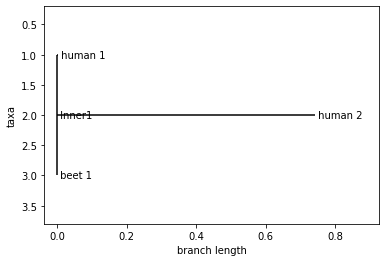

In [20]:
# imports matplotlis and pyplot to alter tree plot
import matplotlib
import matplotlib.pyplot as plt

# drawing tree from Phylo
fig = Phylo.draw(LR_tree)

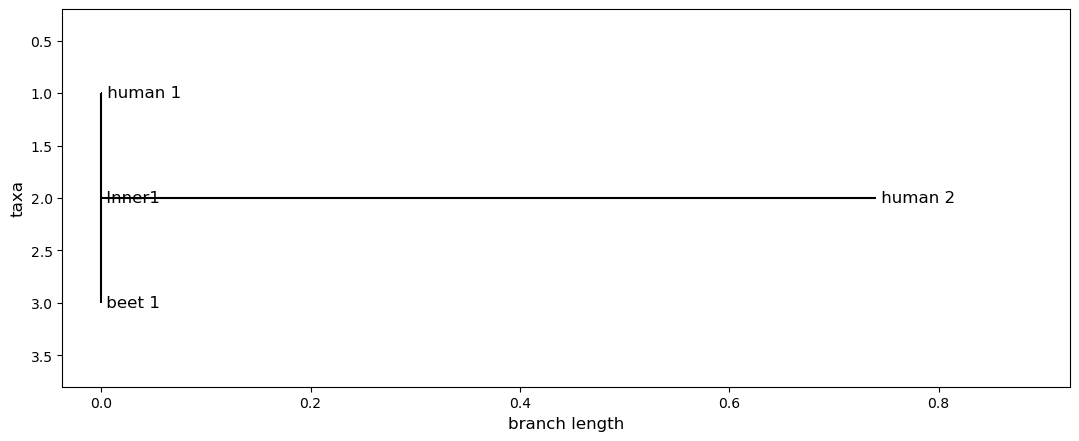

In [21]:
# uses matplotlib to change figsize, font, font size, and save LR tree to make graph more readable
fig = plt.figure(figsize = (13, 5), dpi = 100)
matplotlib.rc("font", size = 12)
matplotlib.rc("xtick", labelsize = 10)
matplotlib.rc('ytick', labelsize = 10)

axes = fig.add_subplot(1, 1, 1)
Phylo.draw(LR_tree, axes = axes)
fig.savefig("LR tree")

Our phylogenetic tree is showing a closer relationship between human 1 and beet 1 than human 1 and human 2.

In this next portion I am going to compute the similarity score from a pairwise sequence alignment to quantify the similarity between these two pairs (human 1 and human 2; human 1 and beet 1). 

In [22]:
# importing pairwise2 which is a simple pairwise sequence function which will give us similarity score
from Bio import pairwise2

In [23]:
# alignments is a global variable that contains the alignment information for human_1_seq and human_2_seq
alignments_human = pairwise2.align.globalxx(human_1_seq, human_2_seq)

In [24]:
alignments_human

[Alignment(seqA='A--A-AG-GAG-GT--GATCCAGCCGCA-GGTTCTCCTACGGCTACCTTGTTA-CGACTT--CA--C---CCTAAT-CATTTGTCCC\nACCTTAG---A-CG-GC-T-C-GC-TCCCTA---AAAGG-G-TTACGCCACCGG-CTTCGGG-TGTTACAAACTCT-----C-A-TGGT-GTGA\nCGGGC-G-GT-----GT-G--TACAAG---GCCC----G-GG---A-A-CGTATTCACCGC-GG---C-G-TGCTGA-T-CCGCGATTACTAGCGATTCC--G\nA-CTTCGTGT--A-GG--CGAGTTGCAGCCT-ACA-G-TC--CG-AA-CTGAGAATG-GCTTTAA-GAGATTAGCTTGACCTCGC\nGGTCTCGCAACTCGT-TGTAC-CATCCA-TTG--TAGCACGTGTGTAGCCCA-GG-TCAT--AAGGGGCATGATGATTT\nGACGTCATCC-CC-ACCTTC-CTCCG-GT---TTGTCAC-CGGC-AGTC-TT---ACT-A-GA---GTGCCCAACTAAATGCTGGCAA\nCTAGTCATAAGGGTT-GCGCT--C-GTTGC-GGGA--CTTAACCCAACATC-TC--ACGACACGAG-CTGAC-G-A-C-AACCAT\nGCACCAC-CTGTC-ATTT-TGCCCCC--GAAGG-----GG-----AAACCTGATCTCTCAGGT-GATCA---A-AAGA-TG-TCAAGAC-CT-G\n-GT-AAGG-T-TCT-TCG-CGTTG-C--T-TCG-AATT--A-AA--CCAC----A--TG-C-T-CCA-C--C-GC--T--T---GT-GCG-GGCCCC---CGTCAAT-TCCT\nTTGAG-TTTCAACCTTGCGGTCGTACTC---C---C-CAGGCGGAATGCTT---AATG-C-G-T-T--A--GC--TGCGGC--A-CT-GAAGG--G--C\n---GGAAACCCTCC---AACACCTA-GCAT-T-CATC

In [25]:
human_human_score = 1022.0

In [26]:
# alignments_human_1_beet_1 is a global variable that contains the alignment information for human_1_seq and beet_1_seq
alignments_human_1_beet_1 = pairwise2.align.globalxx(human_1_seq, beet_1_seq)

In [27]:
alignments_human_1_beet_1

[Alignment(seqA='AAAGGAGGTGATCCAGCCGCAGGTTCTCCTACGGCTACCTTGTTACGACTTCACCCTAATCATTTGTCCC\nACCTTAGACGGCTCGCTCCCTAAAAGGGTTACGCCACCGGCTTCGGGTGTTACAAACTCTCATGGTGTGA\nCGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCGTGCTGATCCGCGATTACTAGCGATTCCG\nACTTCGTGTAGGCGAGTTGCAGCCTACAGTCCGAACTGAGAATGGCTTTAAGAGATTAGCTTGACCTCGC\nGGTCTCGCAACTCGTTGTACCATCCATTGTAGCACGTGTGTAGCCCAGGTCATAAGGGGCATGATGATTT\nGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTTACTAGAGTGCCCAACTAAATGCTGGCAA\nCTAGTCATAAGGGTTGCGCTCGTTGCGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAACCAT\nGCACCACCTGTCATTTTGCCCCCGAAGGGGAAACCTGATCTCTCAGGTGATCAAAAGATGTCAAGACCTG\nGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCCT\nTTGAGTTTCAACCTTGCGGTCGTACTCCCCAGGCGGAATGCTTAATGCGTTAGCTGCGGCACTGAAGGGC\nGGAAACCCTCCAACACCTAGCATTCATCGTTTACGGCATGGACTACCAGGGTATCTAATCCTGTTCGCTA\nCCCATGCTTTCGAGCCTCAGCGTCAGTTACAGACCAGACAGCCGCCTTCGCCACTGGTGTTCTTCCATAT\nATCTACGCATTTCACCGCTACACATGGAGTTCCACTGTCCTCTTCTGCACTCAAGTTTCCCAGTTTCCGA\nTGCACTTCCTCGGTTAAGCCGAGGGCTTTCACATCAGACTTAAAAAA

In [28]:
human_beet_score = 1592.0

As one can see, the human_beet_score is 1592 which is much larger than the human_human_score of 1022. 

#### Discussion

After observing an abnormally high similarity score between the human genome and the beet genome, I decided to look further into the genomic data I selected. I quickly realized that both beet_1 and human_1 BIOML-A3 strain while human_2 Lrh47 strain. Unfortunately. there is no other genetic data for BIOML-A3 strain available. Additionally, no other organisms have the rRNA 16S genome available on NCBI.

Upon further research in pursuit of better genomic data, I found that while 16S rRNA genmoic data is the best for taxanomic differentation of microbes, this data is not widely available for the same species accross different hosts, and the quality of 16S rRNA is not validated on NCBI. Other databases that are microbial and rRNA 16S specific such as EzBioCloud, Riobosmal Database Project, SILVA, and GreenGenes are better for collecting rRNA 16S data, however they often only have one sequence for Lacticaseibacillus rhamnosus and do not indicate host animal. Hopefully, as research continues on the microbiome there will be significantly more rRNA 16S data reported.  

#### References

Forster et al. 2019. A human gut bacterial genome and culture collection for improved
metagenomic analyses. https://www.nature.com/articles/s41587-018-0009-7. /

Kaszab et al. 2022. Draft Genome Sequences of Lacticaseibacillus rhamnosus cek-R1,
Lacticaseibacillus paracasei cek-R2, and Lentilactobacillus otakiensis cek-R3, Isolated from a
Beetroot Product. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8759371/. /

Dutra-Silva et al. 2021. Distribution of Genes Related to Probiotic Effects Across
Lacticaseibacillus rhamnosus Revealed by Population Structure.
https://pubmed.ncbi.nlm.nih.gov/34699013/. /

Caroll et al. 2009. The gastrointestinal microbiome: a malleable, third genome of mammals. link:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4372805/ /

Wu et al. 2022. Evolutionary and dietary relationships of wild mammals based on the gut
microbiome.
https://www.sciencedirect.com/science/article/pii/S0378111921005941?casa_token=J4FwlJzvz1s
AAAAA:HTAV_IG7lcgYGe8mFC0CIKnqOtiTcxd1z9oNJbhnZY0VryRLVfnD_MBSSTnPxYq
EXR2eGu9L4A. /

Lee et al. 2021. Complete Genome Sequence of Lacticaseibacillus rhamnosus CAU 1365, Isolated from Kimchi. https://journals.asm.org/doi/10.1128/MRA.00932-21. /

Kim et al. 2014. New Approaches to Prokaryotic Systematics. https://www.sciencedirect.com/science/article/abs/pii/S0580951714000130. /

Méndez-Garcia, et al. 2018. Metagenomic Protocols and Strategies. https://www.sciencedirect.com/science/article/pii/B9780081022689000021. /


Byrne et al. 2018. Taxonomy of Oral Bacteria. https://www.sciencedirect.com/science/article/abs/pii/S0580951718300060. /

El-Chami et al. 2022. Multiple Proteins of Lacticaseibacillus rhamnosus GG Are Involved in the Protection of Keratinocytes From the Toxic Effects of Staphylococcus aureus. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9134637/.

Zheng et al. 2020. A taxonomic note on the genus Lactobacillus: Description of 23 novel genera, emended description of the genus Lactobacillus Beijerinck 1901, and union of Lactobacillaceae and Leuconostocaceae. https://www.microbiologyresearch.org/content/journal/ijsem/10.1099/ijsem.0.004107. 

#### Code Citations

BioPython : https://biopython.org/DIST/docs/tutorial/Tutorial.html \
BioPython Tutorial: Making a Phylogenetic Tree in Python : https://www.youtube.com/watch?v=wBdz3vFQ4Ks
